In [2]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

In [3]:
data = pd.read_csv('data_RFM.csv')

In [4]:
data.head()

,Unnamed: 0,customer_unique_id,frequency,recency,amount_spent
0,0,7c396fd4830fd04220f754e42b4e5bff,2,335,65.38
1,3,af07308b275d755c9edb36a90c618231,1,40,118.70
2,4,3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90
3,5,7c142cf63193a1473d2e66489a9ae977,1,288,45.00
4,6,72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data.set_index('customer_unique_id', inplace=True)

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

In [68]:
#select 10% of the data to speed up the process
df = data.sample(frac=0.15, random_state=42)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [69]:
df

,frequency,recency,amount_spent
customer_unique_id,,,
275fd80a923b1bf97db8979ad8e254d8,1,459,24.75
a156e873ab29b82c3e8c659399150d2c,1,119,172.13
000a5ad9c4601d2bbdd9ed765d5213b3,1,387,76.99
2abd00de249ff6bc8f96811a29210812,1,321,143.00
2b229b2693dc783259f684b24fcd23a7,1,110,14.90
...,...,...,...
8ecf8af072fe6fa17eb5bf81a3e04068,1,471,104.00
488e30306f8086e753c4b1fb9e39d838,1,170,79.99
8f8447f07ee76dbba29670a88b650e0e,1,461,89.81


In [70]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(df_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

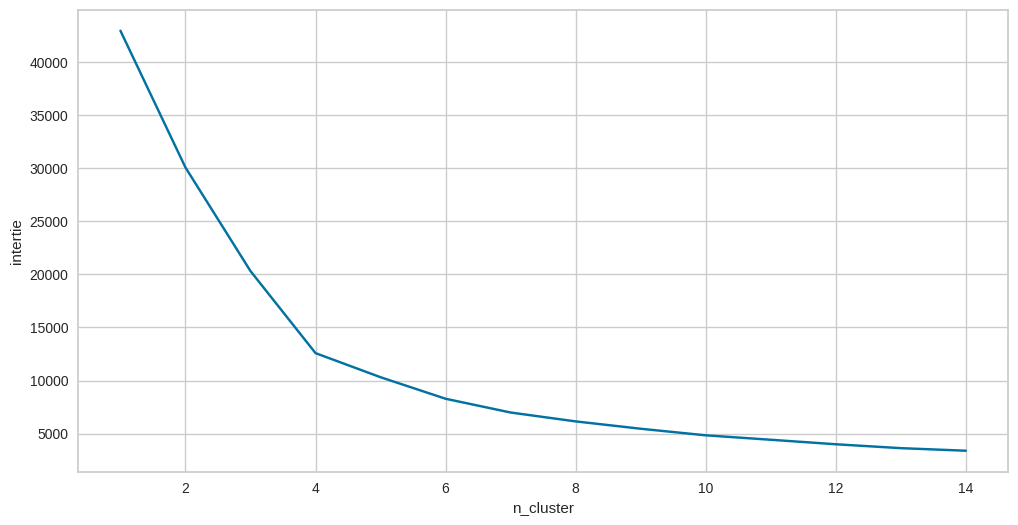

In [71]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [72]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [73]:
df_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=df.index)
df = df.merge(df_cluster, left_index=True, right_index=True)

In [17]:
df.head()

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
275fd80a923b1bf97db8979ad8e254d8,-0.161045,1.412904,-0.534696,0
a156e873ab29b82c3e8c659399150d2c,-0.161045,-0.807004,0.212261,2
000a5ad9c4601d2bbdd9ed765d5213b3,-0.161045,0.942805,-0.269931,0
2abd00de249ff6bc8f96811a29210812,-0.161045,0.511882,0.064623,0
2b229b2693dc783259f684b24fcd23a7,-0.161045,-0.865766,-0.584618,2


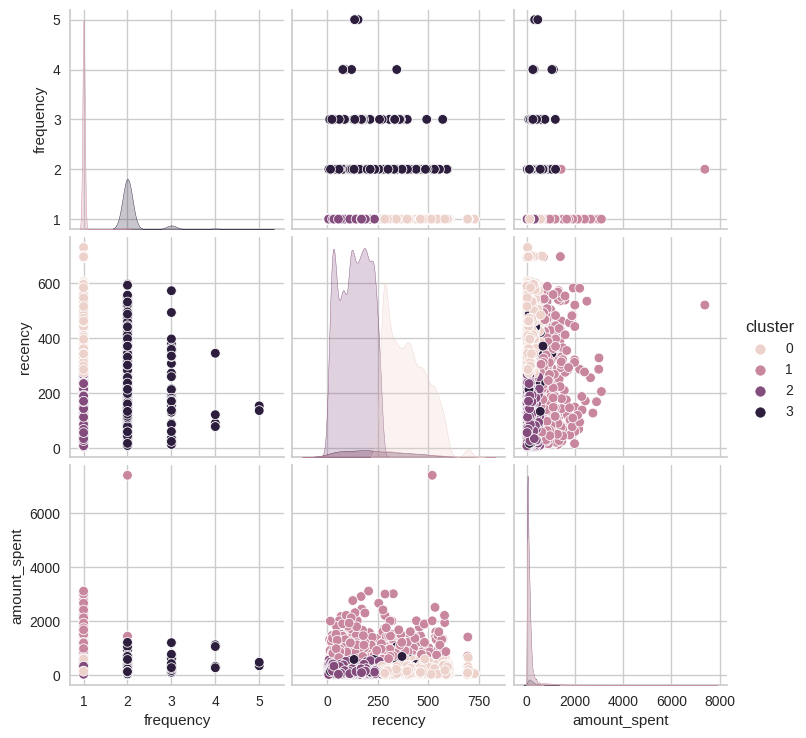

In [74]:
sns.pairplot(df, hue="cluster")

In [75]:
data_cluster_0 = df.loc[df['cluster']==0]
data_cluster_1 = df.loc[df['cluster']==1]
data_cluster_2 = df.loc[df['cluster']==2]
data_cluster_3 = df.loc[df['cluster']==3]

In [76]:
data.describe()

,frequency,recency,amount_spent
count,95420.000000,95420.000000,95420.000000
mean,1.034018,242.600377,130.249385
std,0.211234,153.160320,197.308267
min,1.000000,0.000000,0.850000
25%,1.000000,118.000000,43.890000
50%,1.000000,223.000000,79.900000
75%,1.000000,352.000000,144.990000
max,16.000000,728.000000,7388.000000


In [77]:
data_cluster_0.describe()

,frequency,recency,amount_spent,cluster
count,5601.0,5601.000000,5601.00000,5601.0
mean,1.0,396.931619,102.52298,0.0
std,0.0,96.835515,91.72146,0.0
min,1.0,267.000000,1.20000,0.0
25%,1.0,310.000000,39.99000,0.0
50%,1.0,387.000000,75.00000,0.0
75%,1.0,471.000000,129.99000,0.0
max,1.0,728.000000,633.00000,0.0


In [78]:
data_cluster_1.describe()

,frequency,recency,amount_spent,cluster
count,392.000000,392.000000,392.000000,392.0
mean,1.007653,258.341837,1031.284617,1.0
std,0.087258,151.750049,573.954206,0.0
min,1.000000,13.000000,559.000000,1.0
25%,1.000000,128.500000,679.750000,1.0
50%,1.000000,259.500000,849.450000,1.0
75%,1.000000,364.250000,1200.000000,1.0
max,2.000000,695.000000,7388.000000,1.0


In [79]:
data_cluster_2.describe()

,frequency,recency,amount_spent,cluster
count,7886.0,7886.000000,7886.000000,7886.0
mean,1.0,136.123510,101.370596,2.0
std,0.0,73.711522,87.733552,0.0
min,1.0,4.000000,0.850000,2.0
25%,1.0,73.000000,39.990000,2.0
50%,1.0,138.000000,76.000000,2.0
75%,1.0,198.000000,130.000000,2.0
max,1.0,266.000000,599.000000,2.0


In [80]:
data_cluster_3.describe()

,frequency,recency,amount_spent,cluster
count,434.000000,434.000000,434.000000,434.0
mean,2.103687,234.322581,206.522857,3.0
std,0.379419,144.805841,169.942380,0.0
min,2.000000,8.000000,21.600000,3.0
25%,2.000000,118.250000,99.920000,3.0
50%,2.000000,212.500000,159.800000,3.0
75%,2.000000,343.750000,259.565000,3.0
max,5.000000,595.000000,1199.980000,3.0


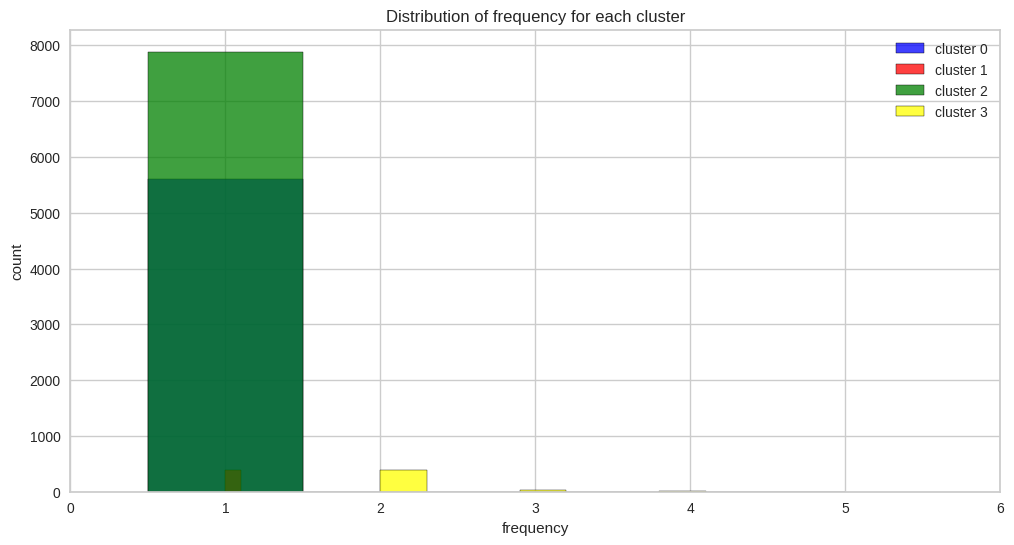

In [81]:
# Plot the distribution of frequency for each cluster
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data_cluster_0['frequency'], ax=ax, color='blue', label='cluster 0')
sns.histplot(data_cluster_1['frequency'], ax=ax, color='red', label='cluster 1')
sns.histplot(data_cluster_2['frequency'], ax=ax, color='green', label='cluster 2')
sns.histplot(data_cluster_3['frequency'], ax=ax, color='yellow', label='cluster 3')
ax.set_title('Distribution of frequency for each cluster')
ax.set_xlabel('frequency')
ax.set_ylabel('count')
ax.set_xlim(0, 6)
ax.legend()

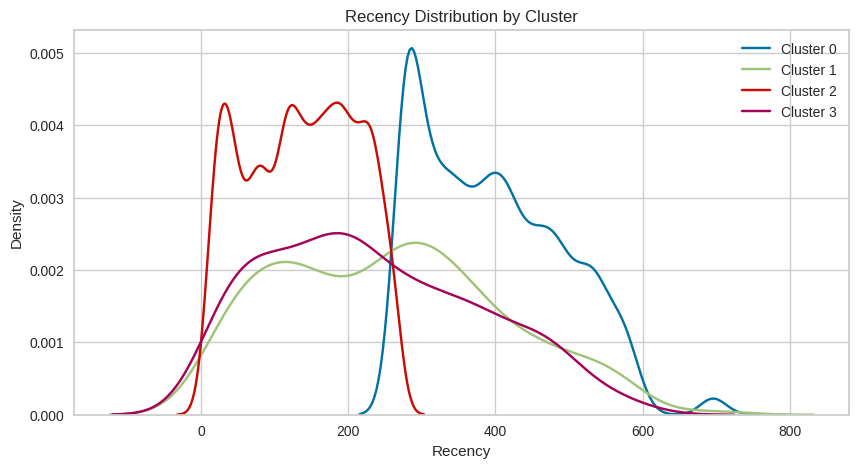

In [82]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['recency'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3['recency'], label='Cluster 3', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

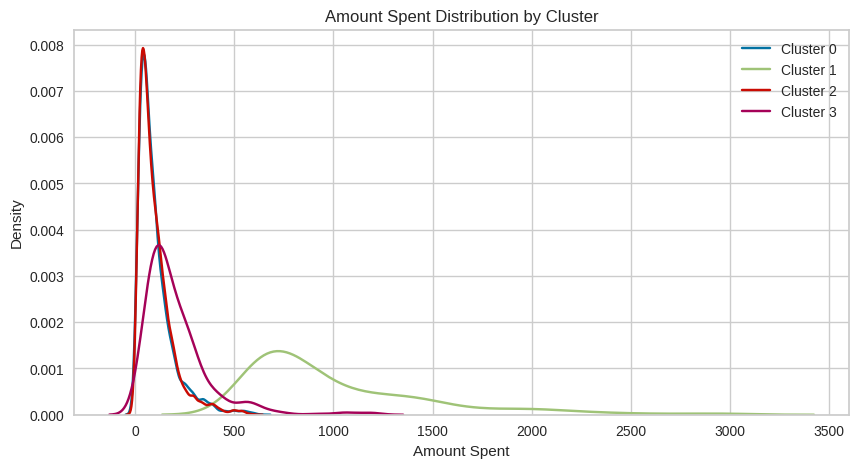

In [83]:
# Plot the distribution of amount spent under 3000 for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0.loc[data_cluster_0['amount_spent']<3000]['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1.loc[data_cluster_1['amount_spent']<3000]['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2.loc[data_cluster_2['amount_spent']<3000]['amount_spent'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3.loc[data_cluster_3['amount_spent']<3000]['amount_spent'], label='Cluster 3', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

In [29]:
data_scaled = data_scaled.merge(df_cluster, left_index=True, right_index=True)

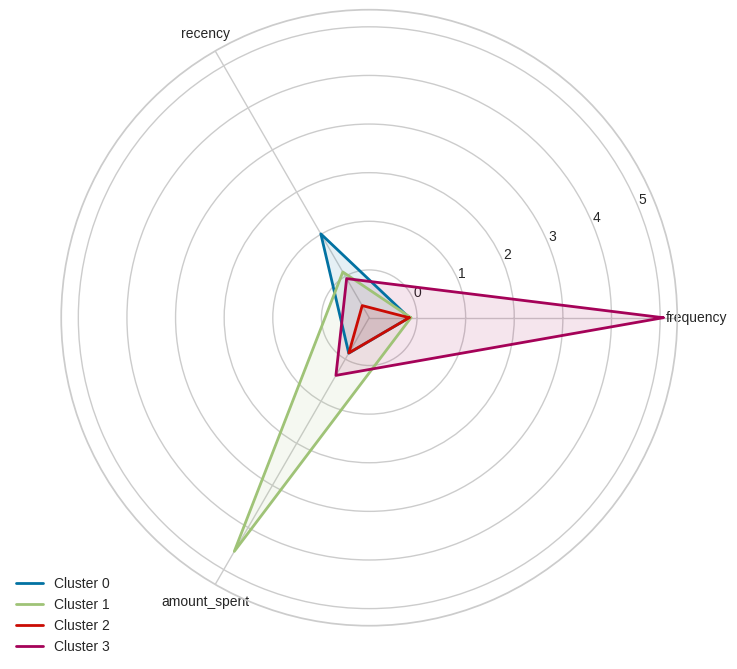

In [84]:
#Radar chart

cluster_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]
variables = ["frequency", "recency", "amount_spent"]
data_values = []
data_scaled.merge(df_cluster, left_index=True, right_index=True)

# Récupération des données pour chaque variable et chaque cluster
for cluster in range(4):
    values = []
    for variable in variables:
        values.append(data_scaled[data_scaled["cluster"] == cluster][variable].mean())
    data_values.append(values)

# Ajout de la première variable à la fin de la liste pour fermer le polygone
for i in range(4):
    data_values[i].append(data_values[i][0])

# Calcul de l'angle pour chaque variable
angles = [n / float(len(variables)) * 2 * np.pi for n in range(len(variables))]
angles.append(angles[0])

# Initialisation du plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Création du polygone pour chaque cluster
for i in range(4):
    values = data_values[i]
    ax.plot(angles, values, linewidth=2, label=cluster_names[i])
    ax.fill(angles, values, alpha=0.1)

# Ajout des labels pour chaque variable
plt.xticks(angles[:-1], variables)

# Ajout de la légende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Affichage du radar chart
plt.show()

In [85]:
#Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled, kmeans.labels_)

0.4956942383175984

In [86]:
#import calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(df_scaled, kmeans.labels_)

11504.185783360503

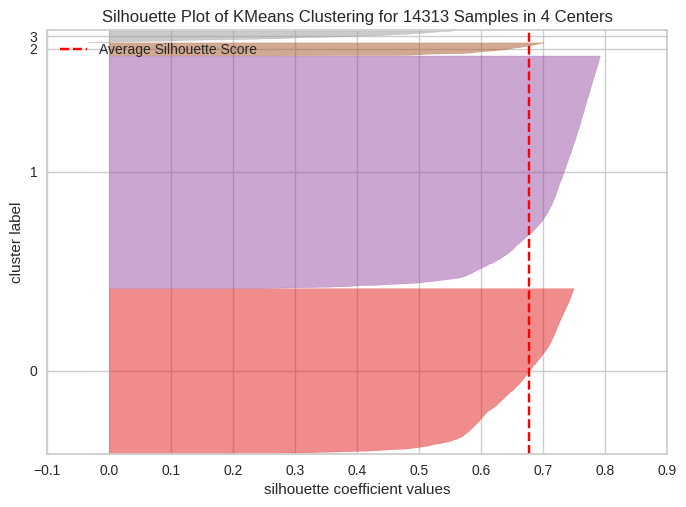

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 14313 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
#import silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(data_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

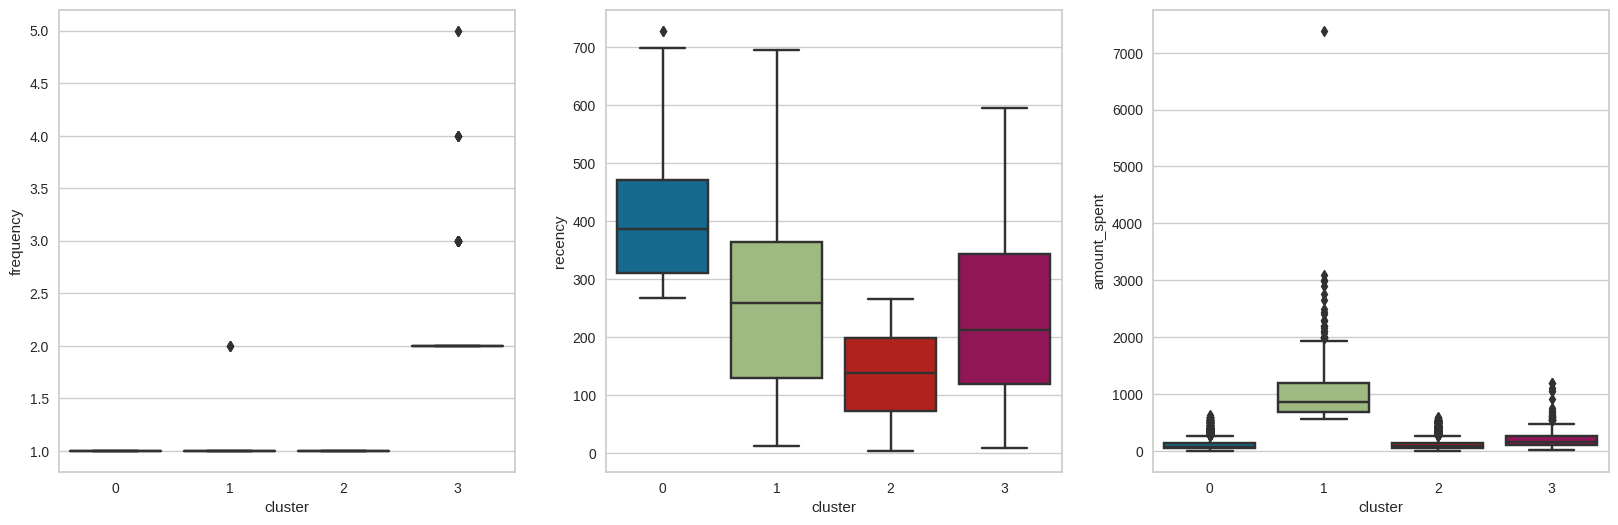

In [88]:
#boxplots for each cluster
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(x='cluster', y='frequency', data=df, ax=ax[0])
sns.boxplot(x='cluster', y='recency', data=df, ax=ax[1])
sns.boxplot(x='cluster', y='amount_spent', data=df, ax=ax[2])
plt.show()

In [89]:
df.drop('cluster', axis=1, inplace=True)

In [90]:
#dbscan clustering
from sklearn.cluster import DBSCAN

In [91]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_scaled)

df_cluster = pd.DataFrame(data={'cluster': dbscan.labels_}, index=df.index)
df_cluster['cluster'].value_counts()

 0    13734
 1      387
-1       79
 4       55
 5       17
 3       14
 2       13
 7        5
 6        5
 8        4
Name: cluster, dtype: int64

In [92]:
data = data.merge(df_cluster, left_index=True, right_index=True)

In [93]:
silhouette_score(df_scaled, dbscan.labels_)

0.45932836263911225

In [94]:
calinski_harabasz_score(df_scaled, dbscan.labels_)

1128.8869063171571

In [95]:
eps = np.linspace(0.01, 1, num=10)
min_samples = np.arange(2, 11, step = 3)

import itertools

combinations = list(itertools.product(eps, min_samples))

N = len(combinations)

In [47]:
def gridsearch_dbscan(X, combinations, min_cluster_eff):
      scores = []
      all_labels = []

      for i, (eps, num_samples) in enumerate(combinations):
            dbscan = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
            labels = dbscan.labels_
            labels_set = set(labels)
            num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

            if (num_clusters < 2) or (num_clusters > 8):
                  scores.append(-10)
                  all_labels.append('bad')
                  c = (eps, num_samples)
                  '''print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")'''
                  continue

            if (len(labels[labels == -1]) / len(labels)) < min_cluster_eff:
                  scores.append(-10)
                  all_labels.append('bad')
                  continue

            score = calinski_harabasz_score(X, labels)

            if score < 5000:
                  scores.append(-10)
                  all_labels.append('bad')
                  continue

            scores.append(score)
            all_labels.append(labels)
            print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels[-1]}, NumClusters: {num_clusters}")

      best_index = np.argmax(scores)
      best_parameters = combinations[best_index]
      best_labels = all_labels[best_index]
      best_score = scores[best_index]

      return {'best_epsilon': best_parameters[0],
      'best_min_samples': best_parameters[1], 
      'best_labels': best_labels,
      'best_score': best_score}

In [49]:
'''gridsearch_dbscan(df_scaled, combinations, 50)'''

{'best_epsilon': 0.01,
 'best_min_samples': 2,
 'best_labels': 'bad',
 'best_score': -10}

In [96]:
def get_scores_and_labels(combinations, X):
      scores = []
      all_labels = []

      for i, (eps, num_samples) in enumerate(combinations):
            dbscan = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
            labels = dbscan.labels_
            labels_set = set(labels)
            num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

            if (num_clusters < 2) or (num_clusters > 8):
                  scores.append(-10)
                  all_labels.append('bad')
                  c = (eps, num_samples)
                  '''print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")'''
                  continue

            if silhouette_score(X, labels) < 0:
                  scores.append(-10)
                  all_labels.append('bad')
                  continue


            scores.append(silhouette_score(X, labels))
            all_labels.append(labels)
            print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels[-1]}, NumClusters: {num_clusters}")

      best_index = np.argmax(scores)
      best_parameters = combinations[best_index]
      best_labels = all_labels[best_index]
      best_score = scores[best_index]

      return {'best_epsilon': best_parameters[0],
      'best_min_samples': best_parameters[1], 
      'best_labels': best_labels,
      'best_score': best_score}

best_dict = get_scores_and_labels(combinations, df_scaled)

Index: 10, Score: 0.46738265418344543, Labels: [0 0 0 ... 0 0 0], NumClusters: 8
Index: 11, Score: 0.4664791744946933, Labels: [0 0 0 ... 0 0 0], NumClusters: 6
Index: 14, Score: 0.46737887199866723, Labels: [0 0 0 ... 0 0 0], NumClusters: 7
Index: 16, Score: 0.4666250318756783, Labels: [0 0 0 ... 0 0 0], NumClusters: 8
Index: 17, Score: 0.474139288697152, Labels: [0 0 0 ... 0 0 0], NumClusters: 4
Index: 19, Score: 0.7179805574291878, Labels: [0 0 0 ... 0 0 0], NumClusters: 5
Index: 20, Score: 0.7233545254915776, Labels: [0 0 0 ... 0 0 0], NumClusters: 3
Index: 22, Score: 0.7155797908933125, Labels: [0 0 0 ... 0 0 0], NumClusters: 4
Index: 23, Score: 0.7173771046952414, Labels: [0 0 0 ... 0 0 0], NumClusters: 4
Index: 25, Score: 0.7155463084036005, Labels: [0 0 0 ... 0 0 0], NumClusters: 4
Index: 26, Score: 0.7214165222443683, Labels: [0 0 0 ... 0 0 0], NumClusters: 3
Index: 28, Score: 0.7203758896774125, Labels: [0 0 0 ... 0 0 0], NumClusters: 3
Index: 29, Score: 0.7208684704409893, L

In [97]:
dbscan = DBSCAN(eps=best_dict['best_epsilon'], min_samples=best_dict['best_min_samples'])
dbscan.fit(df_scaled)

DBSCAN(eps=0.67, min_samples=8)

In [98]:
df_cluster = pd.DataFrame(data={'cluster': dbscan.labels_}, index=df.index)
df_cluster['cluster'].value_counts()

 0    13825
 1      394
-1       78
 2       16
Name: cluster, dtype: int64

In [99]:
silhouette_score(df_scaled, dbscan.labels_)

0.7233545254915776

In [101]:
df_scaled = pd.DataFrame(data=df_scaled, index=df.index, columns=df.columns)

In [102]:
df_cluster = df.merge(df_cluster, left_index=True, right_index=True)

In [103]:
data_cluster_0 = df_cluster[df_cluster['cluster'] == 0]
data_cluster_1 = df_cluster[df_cluster['cluster'] == 1]
data_cluster_2 = df_cluster[df_cluster['cluster'] == 2]
data_cluster_3 = df_cluster[df_cluster['cluster'] == -1]

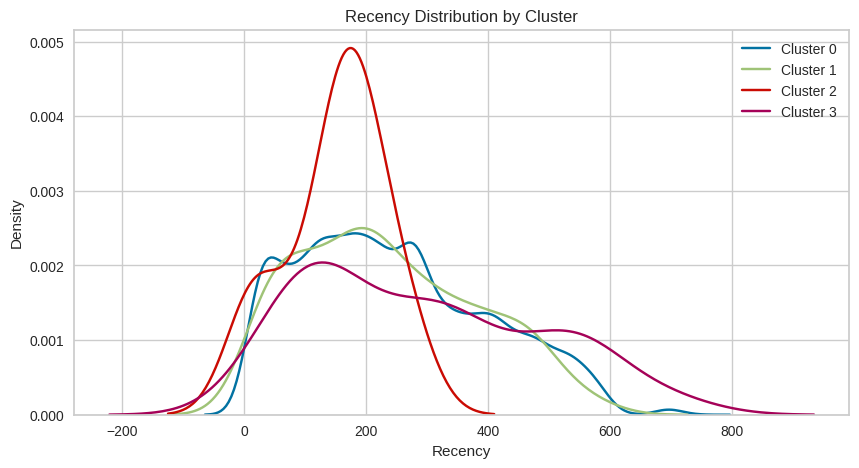

In [104]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['recency'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3['recency'], label='Cluster 3', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

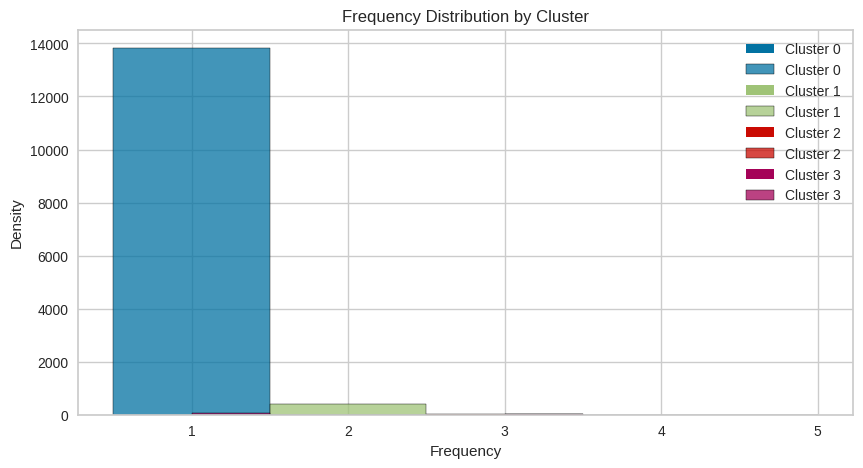

In [112]:
#Plot the distribution of frequency for each cluster
plt.figure(figsize=(10,5))
sns.histplot(data_cluster_0['frequency'], label='Cluster 0', legend=True)
sns.histplot(data_cluster_1['frequency'], label='Cluster 1', legend=True)
sns.histplot(data_cluster_2['frequency'], label='Cluster 2', legend=True)
sns.histplot(data_cluster_3['frequency'], label='Cluster 3', legend=True)
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

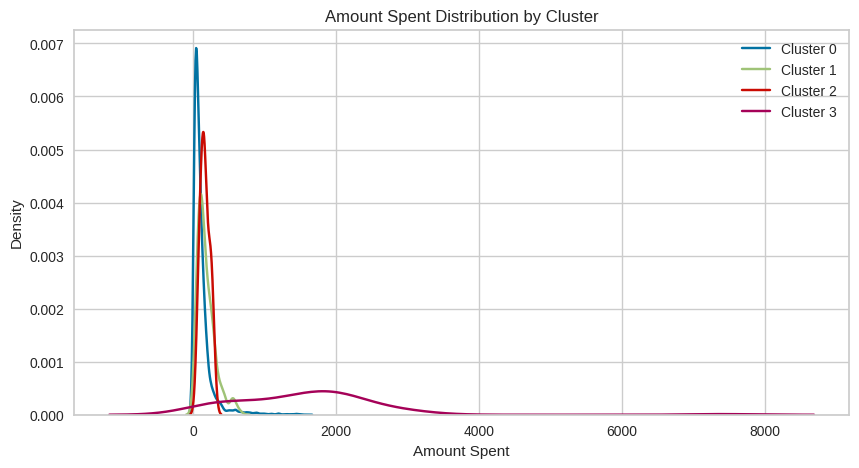

In [113]:
#Plot the distribution of amount_spent for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['amount_spent'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3['amount_spent'], label='Cluster 3', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

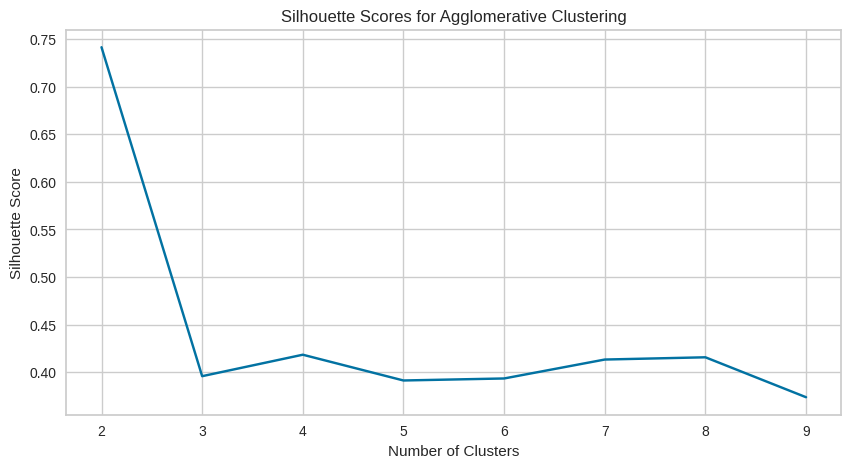

In [167]:
#elbow method for agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 10):
      hierarchical = AgglomerativeClustering(n_clusters=i)
      hierarchical.fit(df_scaled)
      silhouette_scores.append(silhouette_score(df_scaled, hierarchical.labels_))

plt.figure(figsize=(10,5))
plt.plot(range(2,10), silhouette_scores)
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [168]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(df_scaled)

df_cluster = pd.DataFrame(data={'cluster': agg.labels_}, index=df.index)
df_cluster['cluster'].value_counts()

0    13877
1      436
Name: cluster, dtype: int64

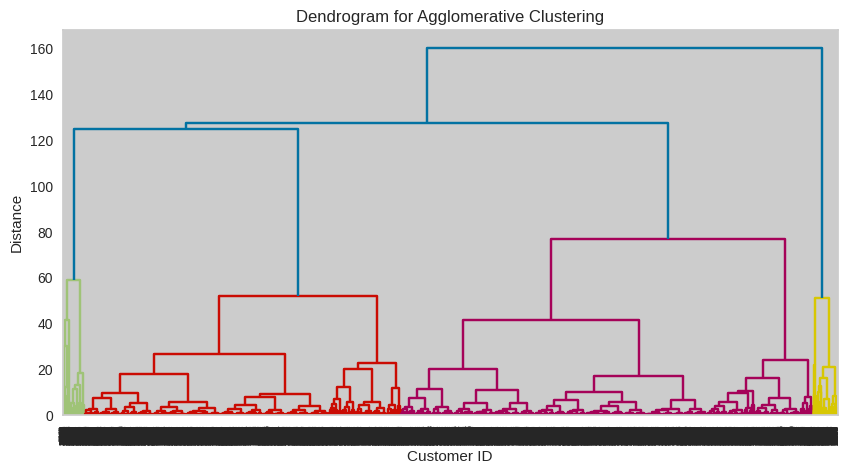

In [169]:
#Dendrogram for agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_scaled, 'ward')
plt.figure(figsize=(10,5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Customer ID')
plt.ylabel('Distance')
plt.show()

In [118]:
df_cluster_0 = df.loc[data_cluster['cluster']==0]
df_cluster_1 = df.loc[data_cluster['cluster']==1]

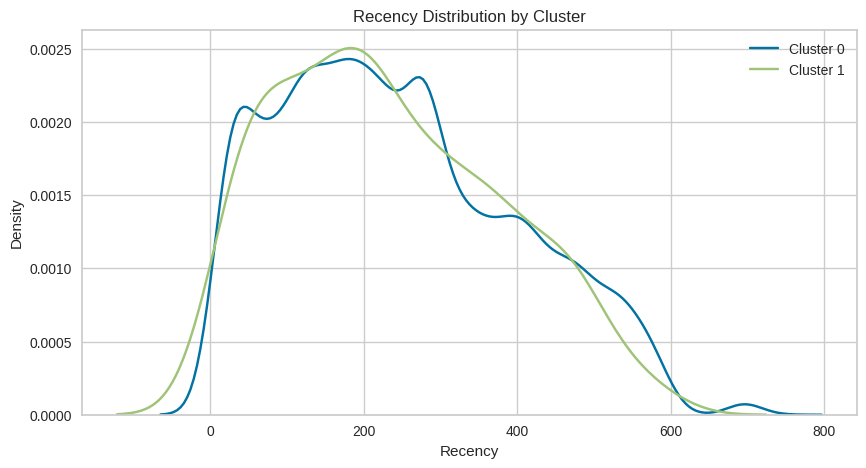

In [119]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(df_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(df_cluster_1['recency'], label='Cluster 1', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

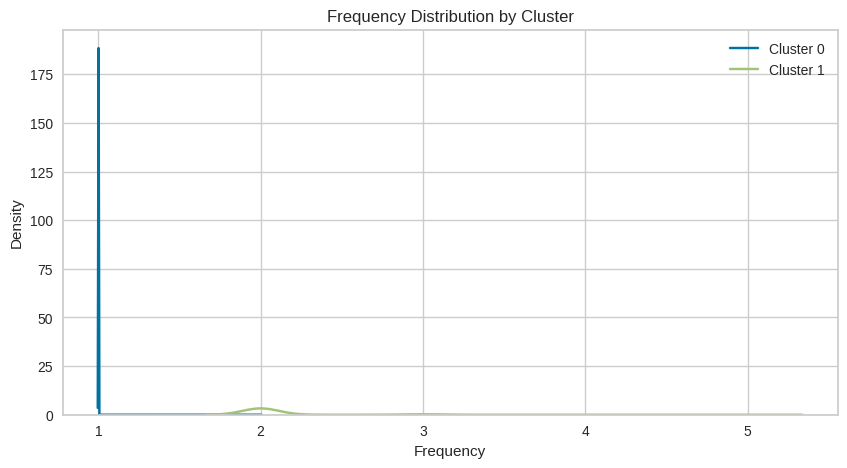

In [120]:
#Plot the distribution of frequency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(df_cluster_0['frequency'], label='Cluster 0', legend=True)
sns.kdeplot(df_cluster_1['frequency'], label='Cluster 1', legend=True)
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

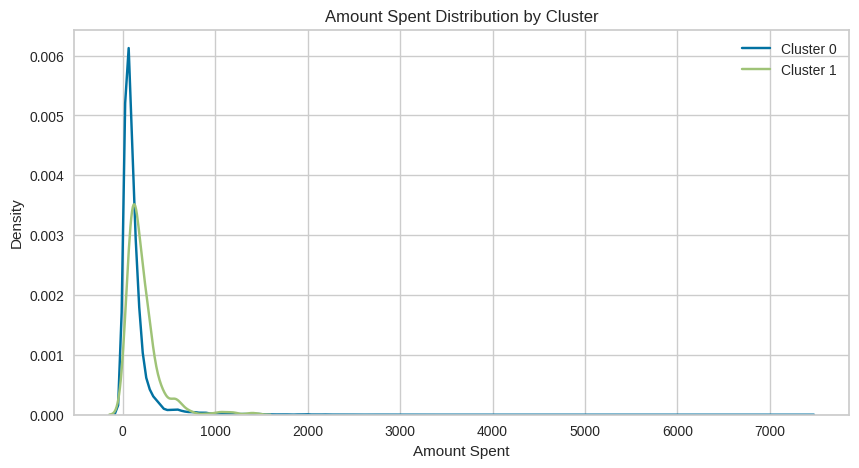

In [121]:
#Plot the distribution of amoount_spent for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(df_cluster_0['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(df_cluster_1['amount_spent'], label='Cluster 1', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

In [122]:
#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, hierarchical.labels_)

0.741526997657985

In [124]:
data_2 = pd.read_csv('data_2.csv', index_col=0)

In [126]:
data_2.head()

,customer_unique_id,frequency,recency,amount_spent,mean_review_score
0,7c396fd4830fd04220f754e42b4e5bff,2,335,65.38,4.5
3,af07308b275d755c9edb36a90c618231,1,40,118.70,4.0
4,3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90,5.0
5,7c142cf63193a1473d2e66489a9ae977,1,288,45.00,5.0
6,72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90,5.0


In [127]:
data_2.set_index('customer_unique_id', inplace=True)

In [128]:
scaler = StandardScaler()
data_scaled_2 = scaler.fit_transform(data_2)
data_scaled_2 = pd.DataFrame(data_scaled_2, columns=data_2.columns, index=data_2.index)

In [129]:
#Select 15% of the data
df_2 = data_2.sample(frac=0.15, random_state=42)
scaler = StandardScaler()
df_scaled_2 = scaler.fit_transform(df_2)

In [130]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(df_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

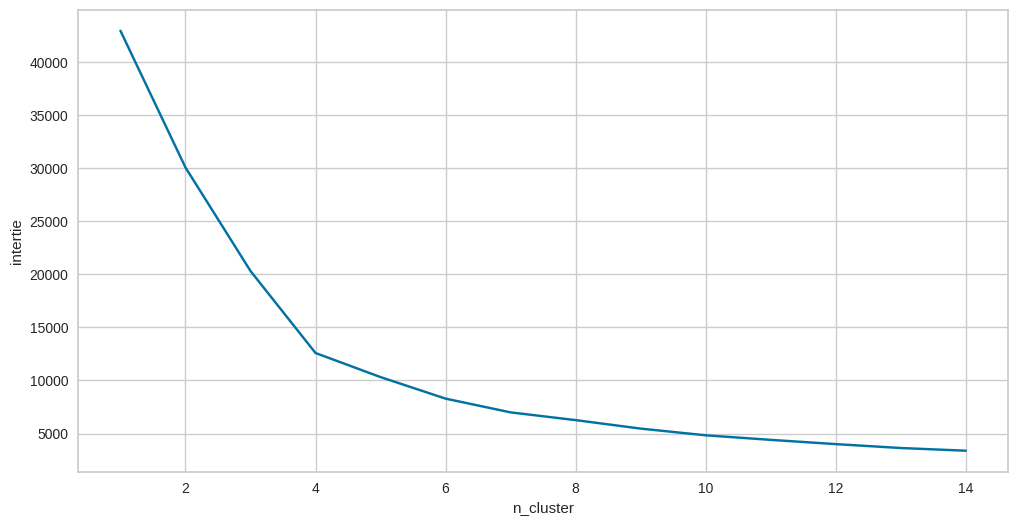

In [131]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [133]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaled_2)

KMeans(n_clusters=4, random_state=0)

In [135]:
data_2_cluster_0 = df_2.loc[kmeans.labels_ == 0]
data_2_cluster_1 = df_2.loc[kmeans.labels_ == 1]
data_2_cluster_2 = df_2.loc[kmeans.labels_ == 2]
data_2_cluster_3 = df_2.loc[kmeans.labels_ == 3]

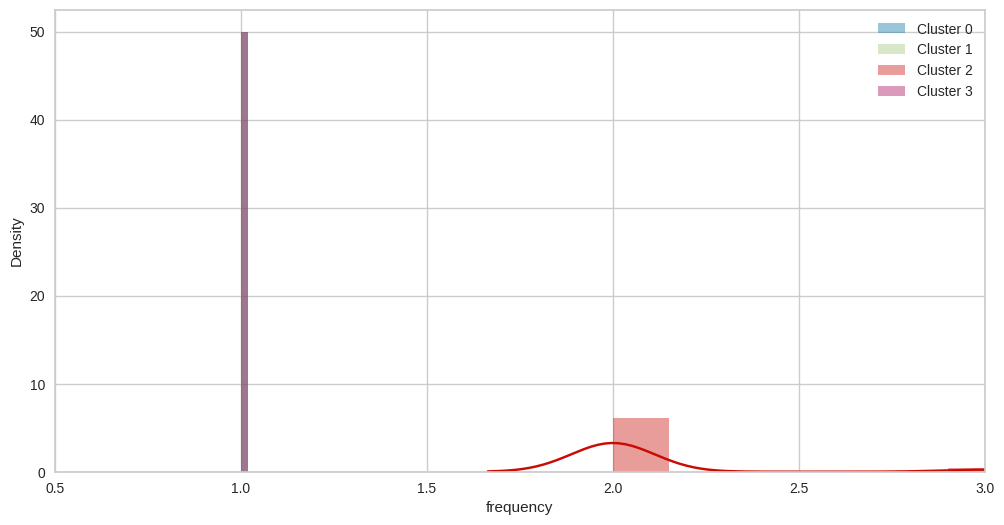

In [139]:
# Plot the distribution of frequency for each cluster
plt.figure(figsize=(12,6))
sns.distplot(data_2_cluster_0['frequency'], label='Cluster 0')
sns.distplot(data_2_cluster_1['frequency'], label='Cluster 1')
sns.distplot(data_2_cluster_2['frequency'], label='Cluster 2')
sns.distplot(data_2_cluster_3['frequency'], label='Cluster 3')
plt.legend()
plt.xlim(0.5, 3)
plt.show()

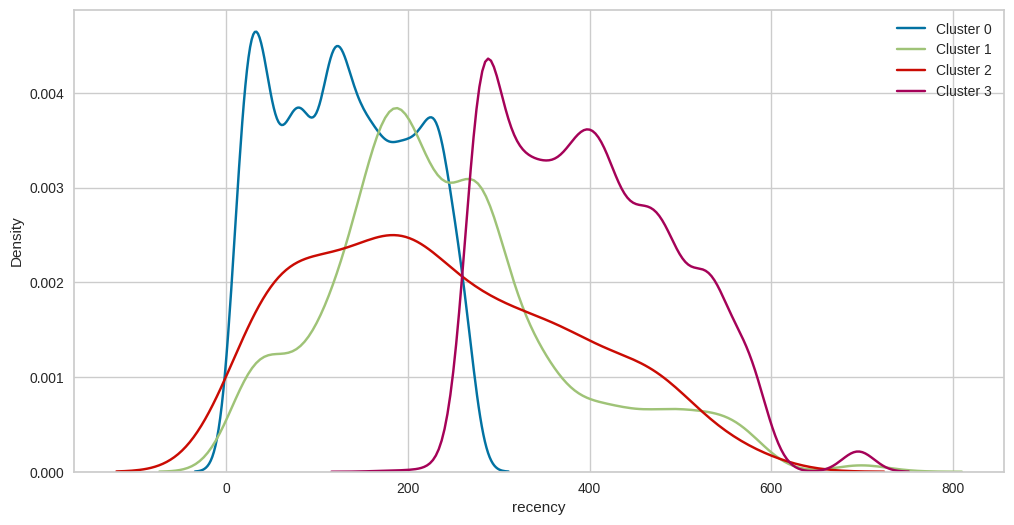

In [140]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['recency'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['recency'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['recency'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['recency'], label='Cluster 3')
plt.legend()
plt.show()

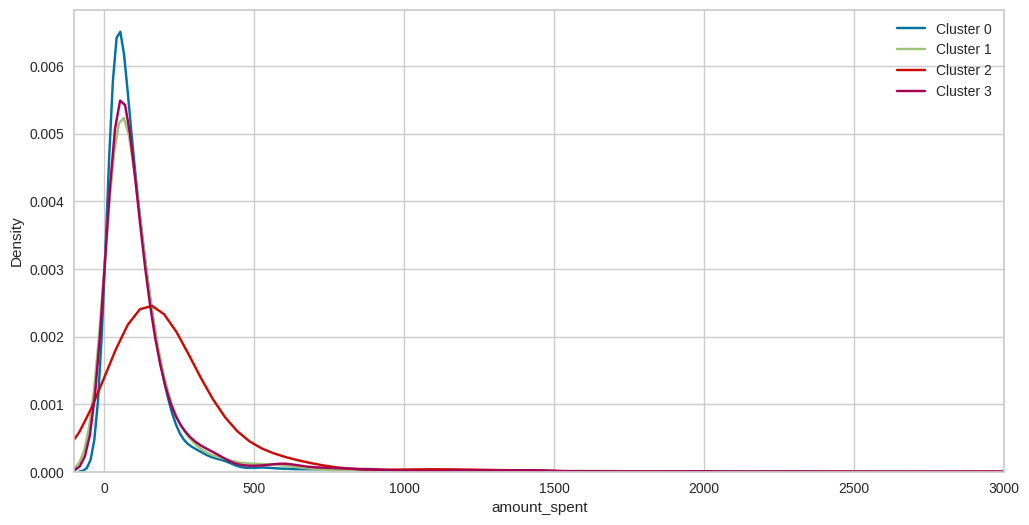

In [141]:
#plot the distribution of amount_spent for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['amount_spent'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['amount_spent'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['amount_spent'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['amount_spent'], label='Cluster 3')
plt.legend()
plt.xlim(-100, 3000)
plt.show()

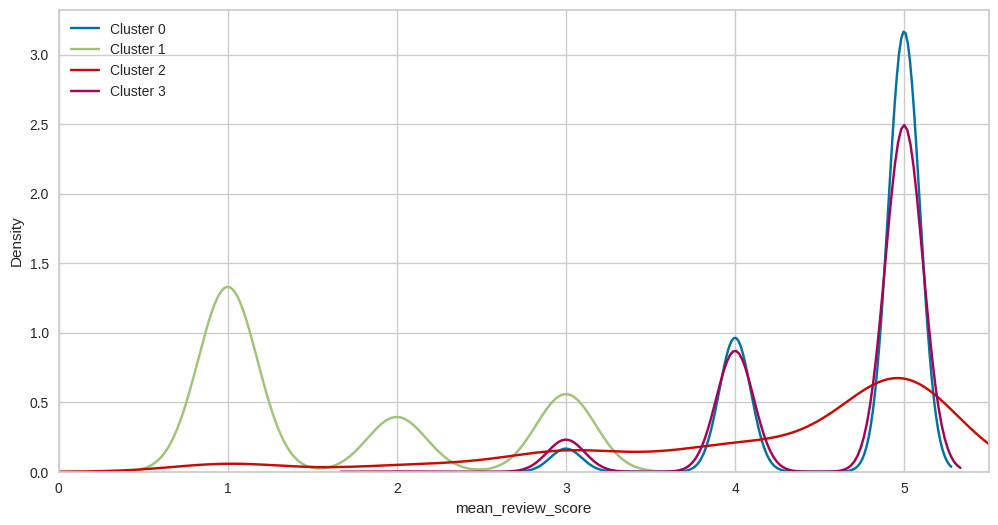

In [142]:
#plot the distribution of mean_review_score for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['mean_review_score'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['mean_review_score'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['mean_review_score'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['mean_review_score'], label='Cluster 3')
plt.legend()
plt.xlim(0, 5.5)
plt.show()

In [145]:
silhouette_score(df_scaled_2, kmeans.labels_)

0.39758799993125726

In [146]:
eps = np.linspace(0.01, 1, num=15)
min_samples = np.arange(2, 20, step = 3)

import itertools

combinations = list(itertools.product(eps, min_samples))

N = len(combinations)

In [147]:
best_dict = get_scores_and_labels(combinations, df_scaled_2)

Index: 17, Score: 0.01769252764248027, Labels: [0 0 1 ... 1 0 7], NumClusters: 8
Index: 22, Score: 0.10116494785691094, Labels: [0 0 1 ... 1 0 3], NumClusters: 8
Index: 23, Score: 0.11578132533743493, Labels: [0 0 1 ... 1 0 3], NumClusters: 6
Index: 29, Score: 0.12026665426038989, Labels: [0 0 1 ... 1 0 3], NumClusters: 8
Index: 33, Score: 0.10854074479102292, Labels: [0 0 1 ... 1 0 3], NumClusters: 8
Index: 34, Score: 0.10419427436222159, Labels: [0 0 1 ... 1 0 3], NumClusters: 8
Index: 39, Score: 0.12268696873635647, Labels: [0 0 1 ... 1 0 3], NumClusters: 7
Index: 40, Score: 0.11755494382175809, Labels: [0 0 1 ... 1 0 3], NumClusters: 7
Index: 41, Score: 0.13895014751198836, Labels: [0 0 1 ... 1 0 3], NumClusters: 7
Index: 45, Score: 0.12442948711743311, Labels: [0 0 1 ... 1 0 3], NumClusters: 7
Index: 46, Score: 0.11342868250303378, Labels: [0 0 1 ... 1 0 3], NumClusters: 8
Index: 47, Score: 0.11058415337750237, Labels: [0 0 1 ... 1 0 3], NumClusters: 8
Index: 52, Score: 0.12592213

In [151]:
dbscan = DBSCAN(eps=best_dict['best_epsilon'], min_samples=best_dict['best_min_samples'])
dbscan.fit(df_scaled_2)

DBSCAN(eps=1.0, min_samples=11)

In [154]:
df_cluster = pd.DataFrame(dbscan.labels_, columns=['cluster'], index=df_2.index)
df_cluster['cluster'].value_counts()

 0    13825
 1      394
-1       77
 2       17
Name: cluster, dtype: int64

In [155]:
df_cluster_0 = df_2.loc[df_cluster['cluster'] == 0]
df_cluster_1 = df_2.loc[df_cluster['cluster'] == 1]
df_cluster_2 = df_2.loc[df_cluster['cluster'] == 2]
df_cluster_3 = df_2.loc[df_cluster['cluster'] == -1]

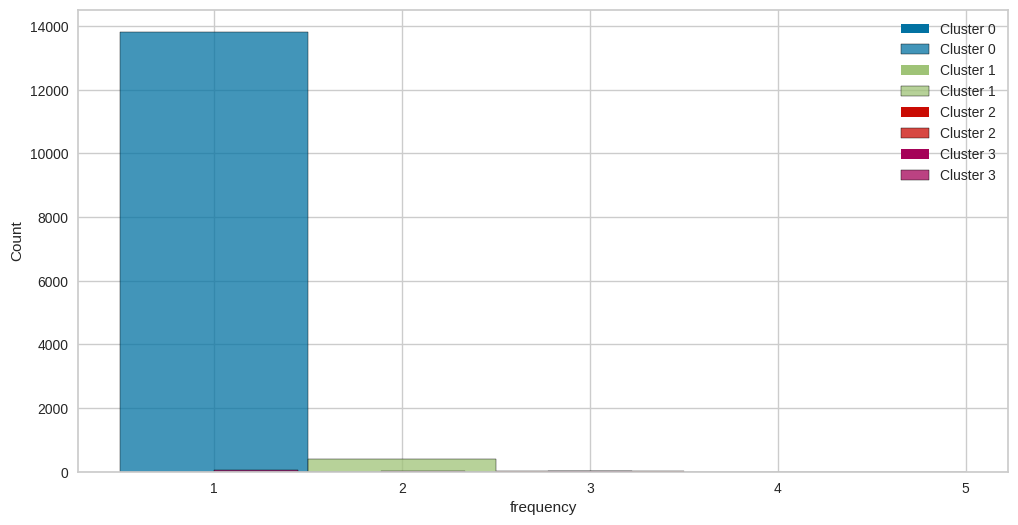

In [158]:
#Plot the distribution of frequency for each cluster
plt.figure(figsize=(12,6))
sns.histplot(df_cluster_0['frequency'], label='Cluster 0')
sns.histplot(df_cluster_1['frequency'], label='Cluster 1')
sns.histplot(df_cluster_2['frequency'], label='Cluster 2')
sns.histplot(df_cluster_3['frequency'], label='Cluster 3')
plt.legend()
plt.show()

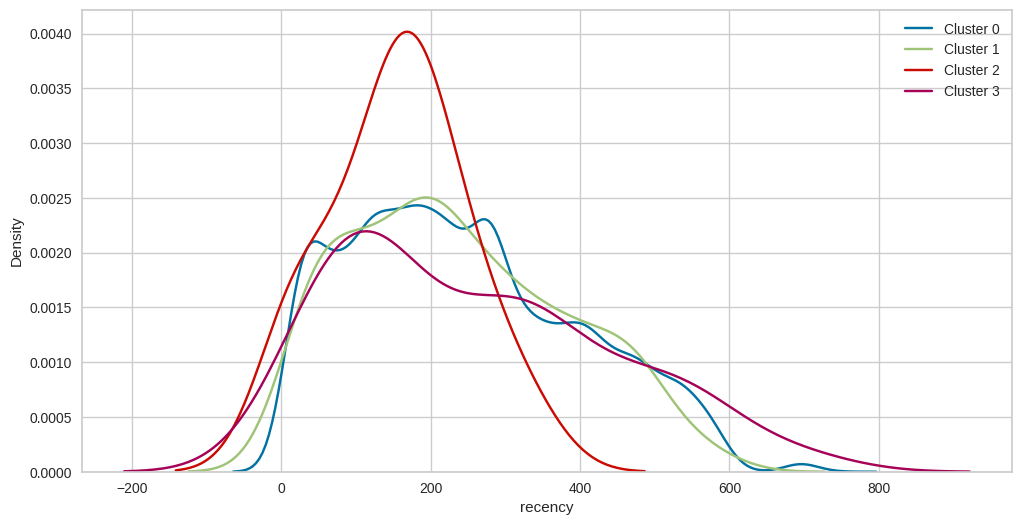

In [159]:
#Plot the distribution of recency for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(df_cluster_0['recency'], label='Cluster 0')
sns.kdeplot(df_cluster_1['recency'], label='Cluster 1')
sns.kdeplot(df_cluster_2['recency'], label='Cluster 2')
sns.kdeplot(df_cluster_3['recency'], label='Cluster 3')
plt.legend()
plt.show()

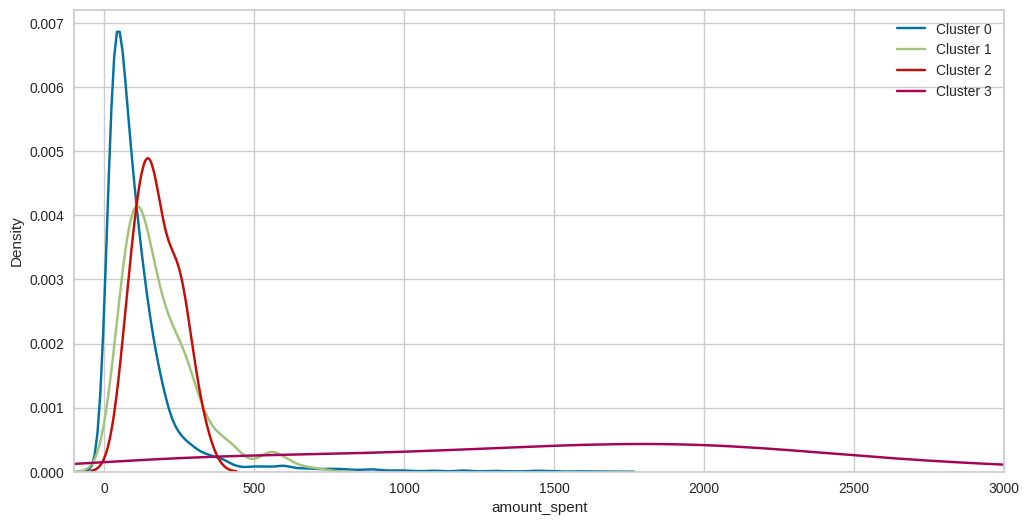

In [162]:
#Plot the distribution of amount_spent for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(df_cluster_0['amount_spent'], label='Cluster 0')
sns.kdeplot(df_cluster_1['amount_spent'], label='Cluster 1')
sns.kdeplot(df_cluster_2['amount_spent'], label='Cluster 2')
sns.kdeplot(df_cluster_3['amount_spent'], label='Cluster 3')
plt.legend()
plt.xlim(-100, 3000)
plt.show()

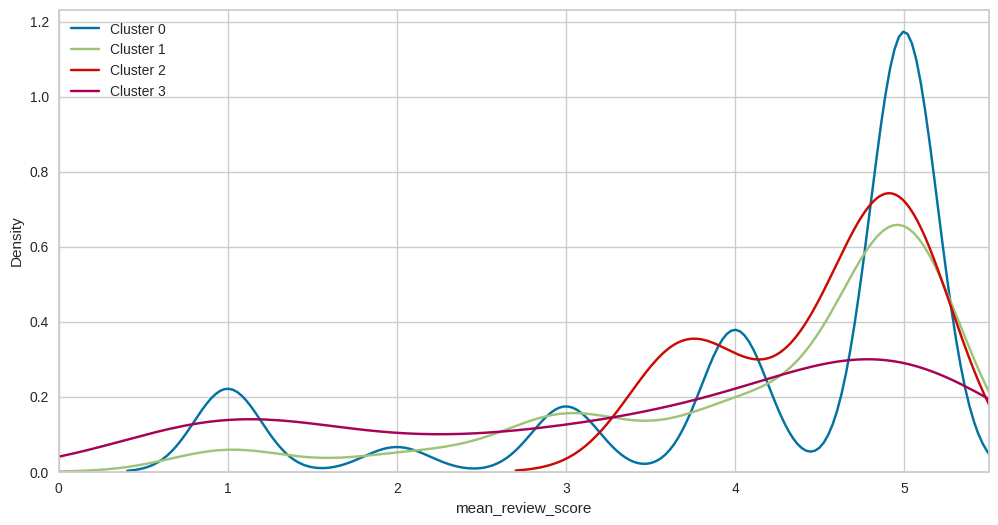

In [163]:
#Plot the distribution of mean_review_score for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(df_cluster_0['mean_review_score'], label='Cluster 0')
sns.kdeplot(df_cluster_1['mean_review_score'], label='Cluster 1')
sns.kdeplot(df_cluster_2['mean_review_score'], label='Cluster 2')
sns.kdeplot(df_cluster_3['mean_review_score'], label='Cluster 3')
plt.legend()
plt.xlim(0, 5.5)
plt.show()

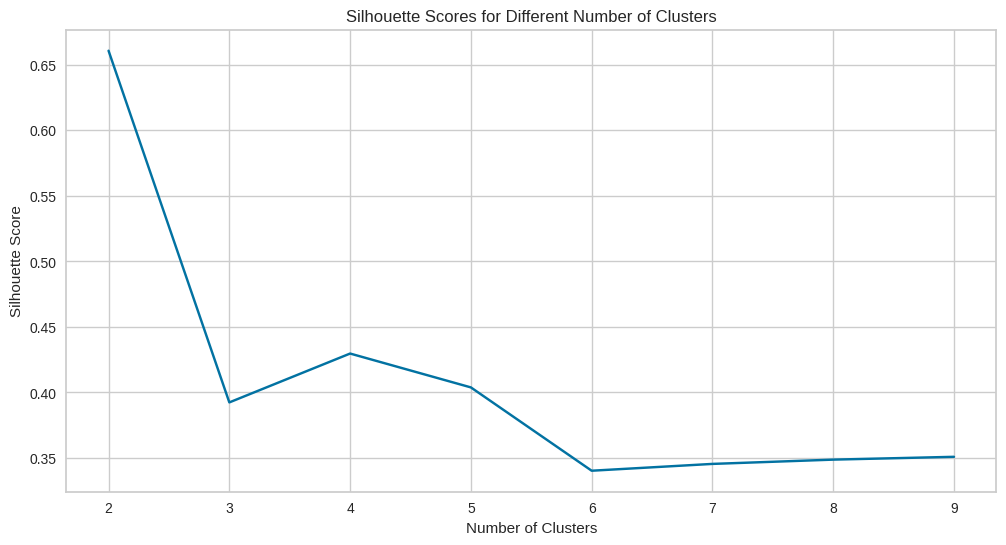

In [164]:
#elbow method for agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Create an empty list to store the silhouette scores
silhouette_scores = []

# Create a range of 2 to 10 clusters
for n_cluster in range(2, 10):
      # Initialize the agglomerative clustering
      agglomerative = AgglomerativeClustering(n_clusters=n_cluster)
      # Fit the model
      agglomerative.fit(df_scaled_2)
      # Predict the labels
      labels = agglomerative.labels_
      # Calculate the silhouette score
      silhouette_scores.append(silhouette_score(df_scaled_2, labels))

# Plot the silhouette scores
plt.figure(figsize=(12,6))
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [165]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(df_scaled_2)

df_agg = pd.DataFrame(agg.labels_, columns=['cluster'], index=df_2.index)
df_agg['cluster'].value_counts()

0    13877
1      436
Name: cluster, dtype: int64

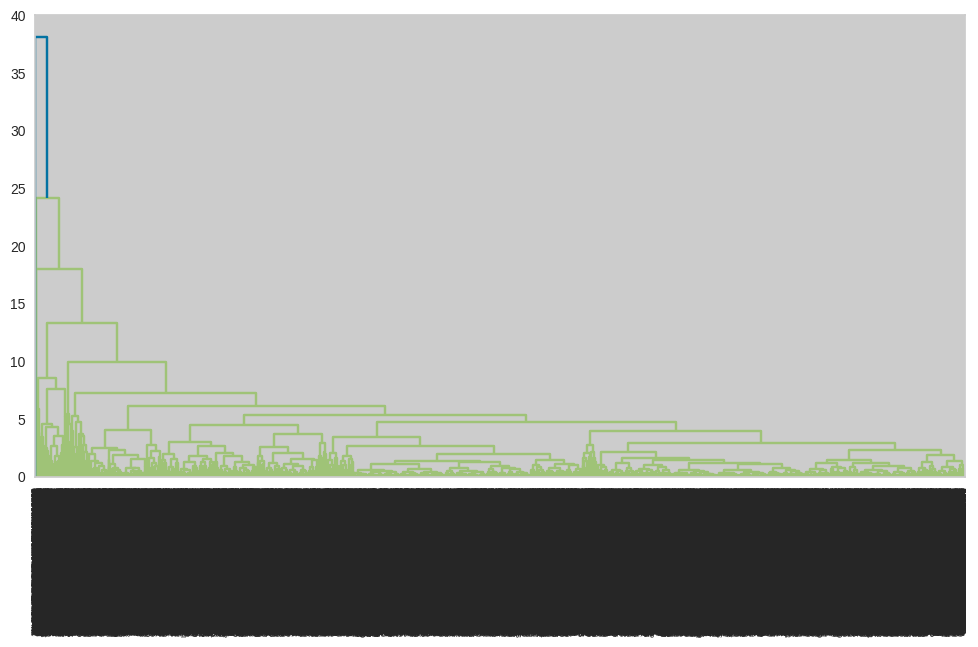

In [166]:
#Dendrogram of agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage: mergings
mergings = linkage(df_scaled_2, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(12,6))
dendrogram(mergings, labels=df_2.index, leaf_rotation=90, leaf_font_size=6)
plt.show()